In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.neighbors import KernelDensity

In [2]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [3]:
dataset = "politician"

df_means = pd.read_csv("master/outputs/cluster_means/%s_means.csv"%dataset)
df_emb = pd.read_csv("master/outputs/embeddings/%s_embedding.csv"%dataset)
    
df_emb.shape

(5908, 16)

In [4]:
with open('master/outputs/assignments/%s.json'%dataset) as json_file:  
    labels = json.load(json_file)
    
df_label = pd.DataFrame({"index" : list(labels.keys()), "label" : list(labels.values())})
df_label["index"] = df_label["index"].astype(int)
df_label = df_label.set_index("index")
df_label = df_label.sort_index()
print(df_label.shape)

(5908, 1)


In [5]:
df_edges = pd.read_csv("master/data/%s_edges.csv"%dataset, index_col="node_1")

In [6]:
df_influencer = df_edges.groupby("node_1").count().sort_values(["node_2"], ascending=False)
df_influencer["influence"] = 100 * df_influencer.node_2 / len(df_label)
df_influencer[:10]

,node_2,influence
node_1,,
1864,215,3.639133
1595,160,2.708192
147,152,2.572783
1474,146,2.471225
98,142,2.403521
112,141,2.386594
726,138,2.335816
1324,135,2.285037
1414,122,2.064997


In [7]:
influencer_idxs = df_influencer[:5].index.values
influencer_idxs

array([1864, 1595,  147, 1474,   98])

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

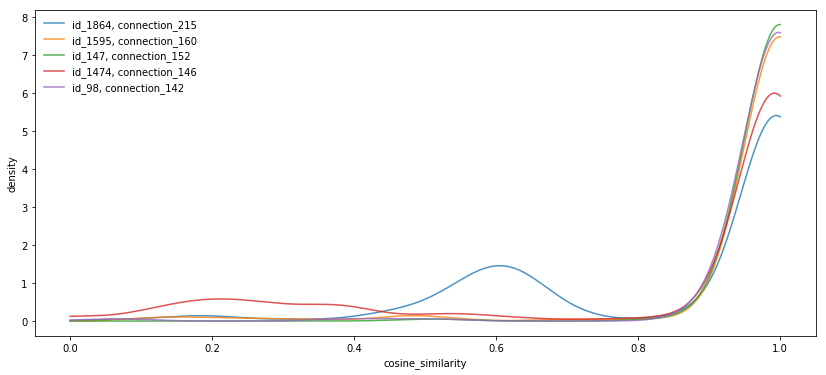

In [9]:
plt.figure(figsize=(14, 6))
for influencer_idx in influencer_idxs:
    sim_arr = cosine_similarity(df_emb.loc[[influencer_idx]], df_emb.loc[df_edges.loc[influencer_idx].node_2.values])[0]
    x_grid = np.linspace(0, 1, 1000)
    pdf = kde_sklearn(sim_arr, x_grid, bandwidth=0.05)

    plt.plot(x_grid, pdf, alpha=0.8, label="id_%i, connection_%i"%(influencer_idx, df_influencer.loc[influencer_idx].node_2))
#     plt.hist(sim_arr, density=True)
plt.legend(frameon=False)
plt.xlabel("cosine_similarity")
plt.ylabel("density")

plt.savefig("outputs/top_influencer_%s.png"%dataset)